<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8125 entries, 0 to 8124
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8125 non-null   object
 1   cap-shape                 8125 non-null   object
 2   cap-surface               8125 non-null   object
 3   cap-color                 8125 non-null   object
 4   bruises                   8125 non-null   object
 5   odor                      8125 non-null   object
 6   gill-attachment           8125 non-null   object
 7   gill-spacing              8125 non-null   object
 8   gill-size                 8125 non-null   object
 9   gill-color                8125 non-null   object
 10  stalk-shape               8125 non-null   object
 11  stalk-root                8125 non-null   object
 12  stalk-surface-above-ring  8125 non-null   object
 13  stalk-surface-below-ring  8125 non-null   object
 14  stalk-color-above-ring  

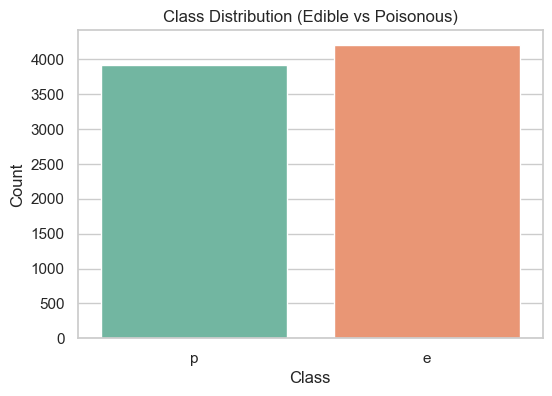

class
e    4208
p    3917
Name: count, dtype: int64
class
e    4208
p    3917
Name: count, dtype: int64
Missing values per column:
Series([], dtype: int64)


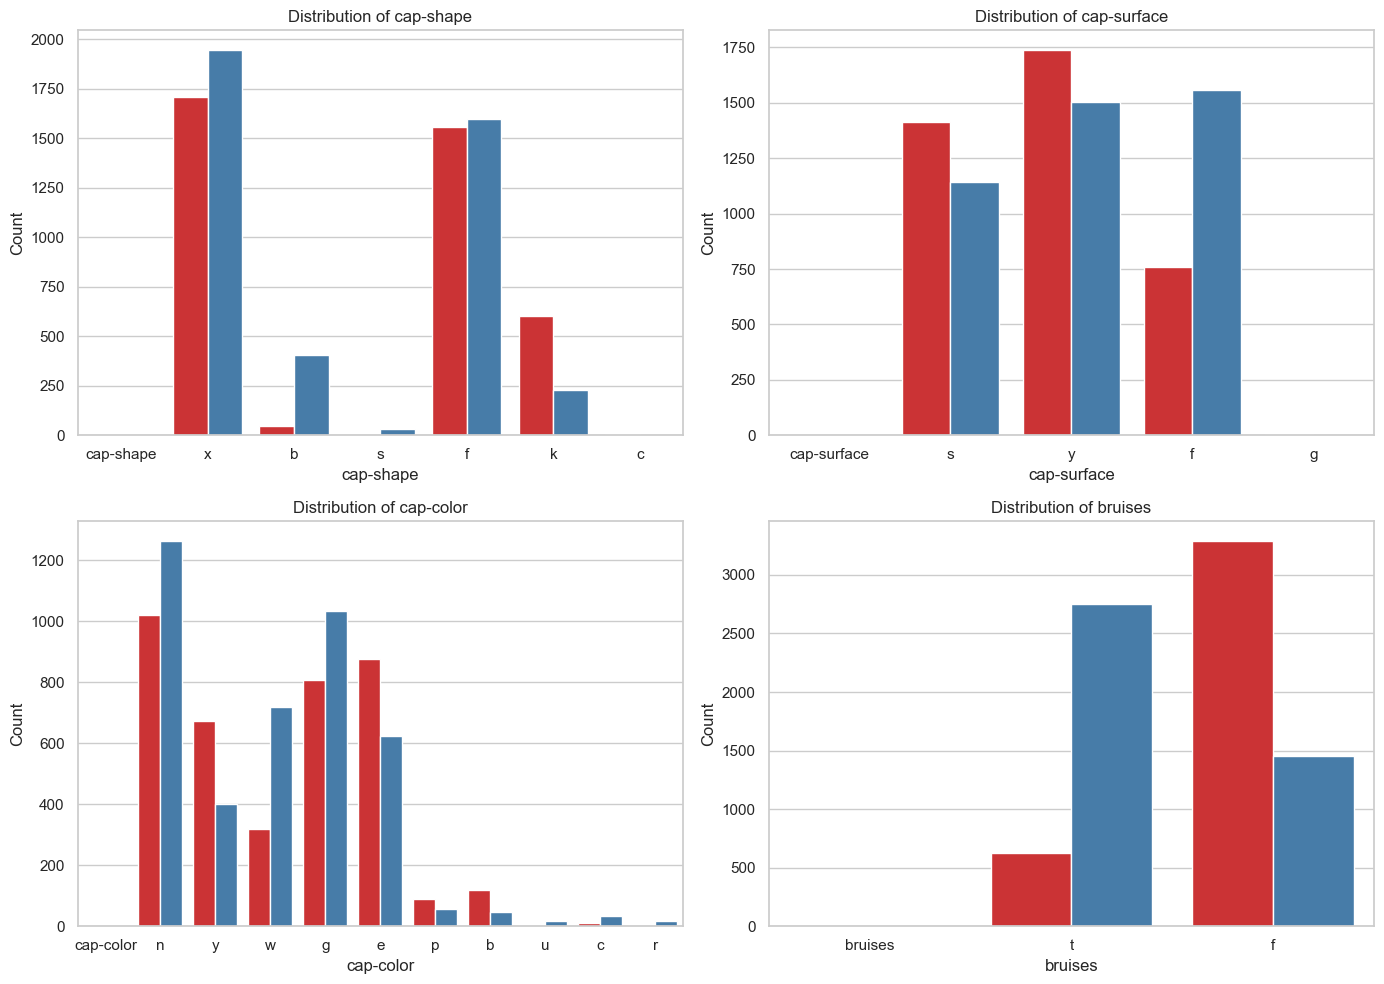

Top Correlations with Target (Poisonous Mushroom):
                     Feature Encoded Feature  Correlation
23                      odor               f     0.623710
56  stalk-surface-above-ring               k     0.587523
60  stalk-surface-below-ring               k     0.573392
36                 gill-size               n     0.539888
20                   bruises               f     0.501303


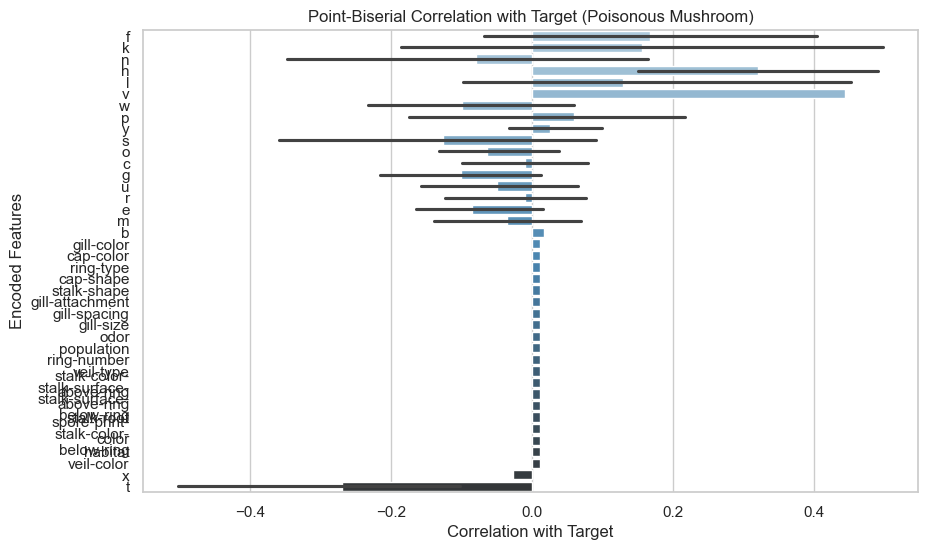

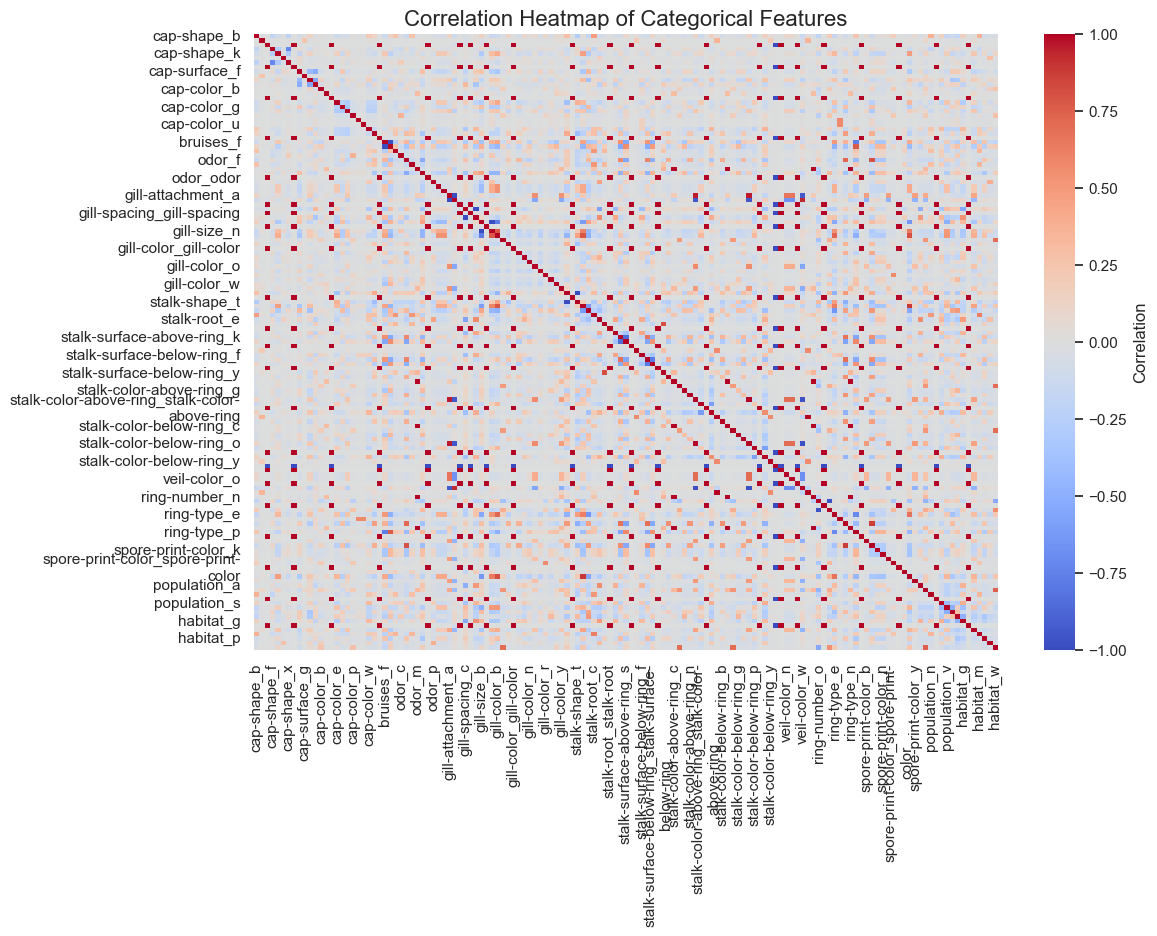


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\lloyd\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\lloyd\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\lloyd\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found

c:\Users\lloyd\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\lloyd\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\lloyd\AppData\Roaming\Python\Python311\si

AttributeError: _ARRAY_API not found

c:\Users\lloyd\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


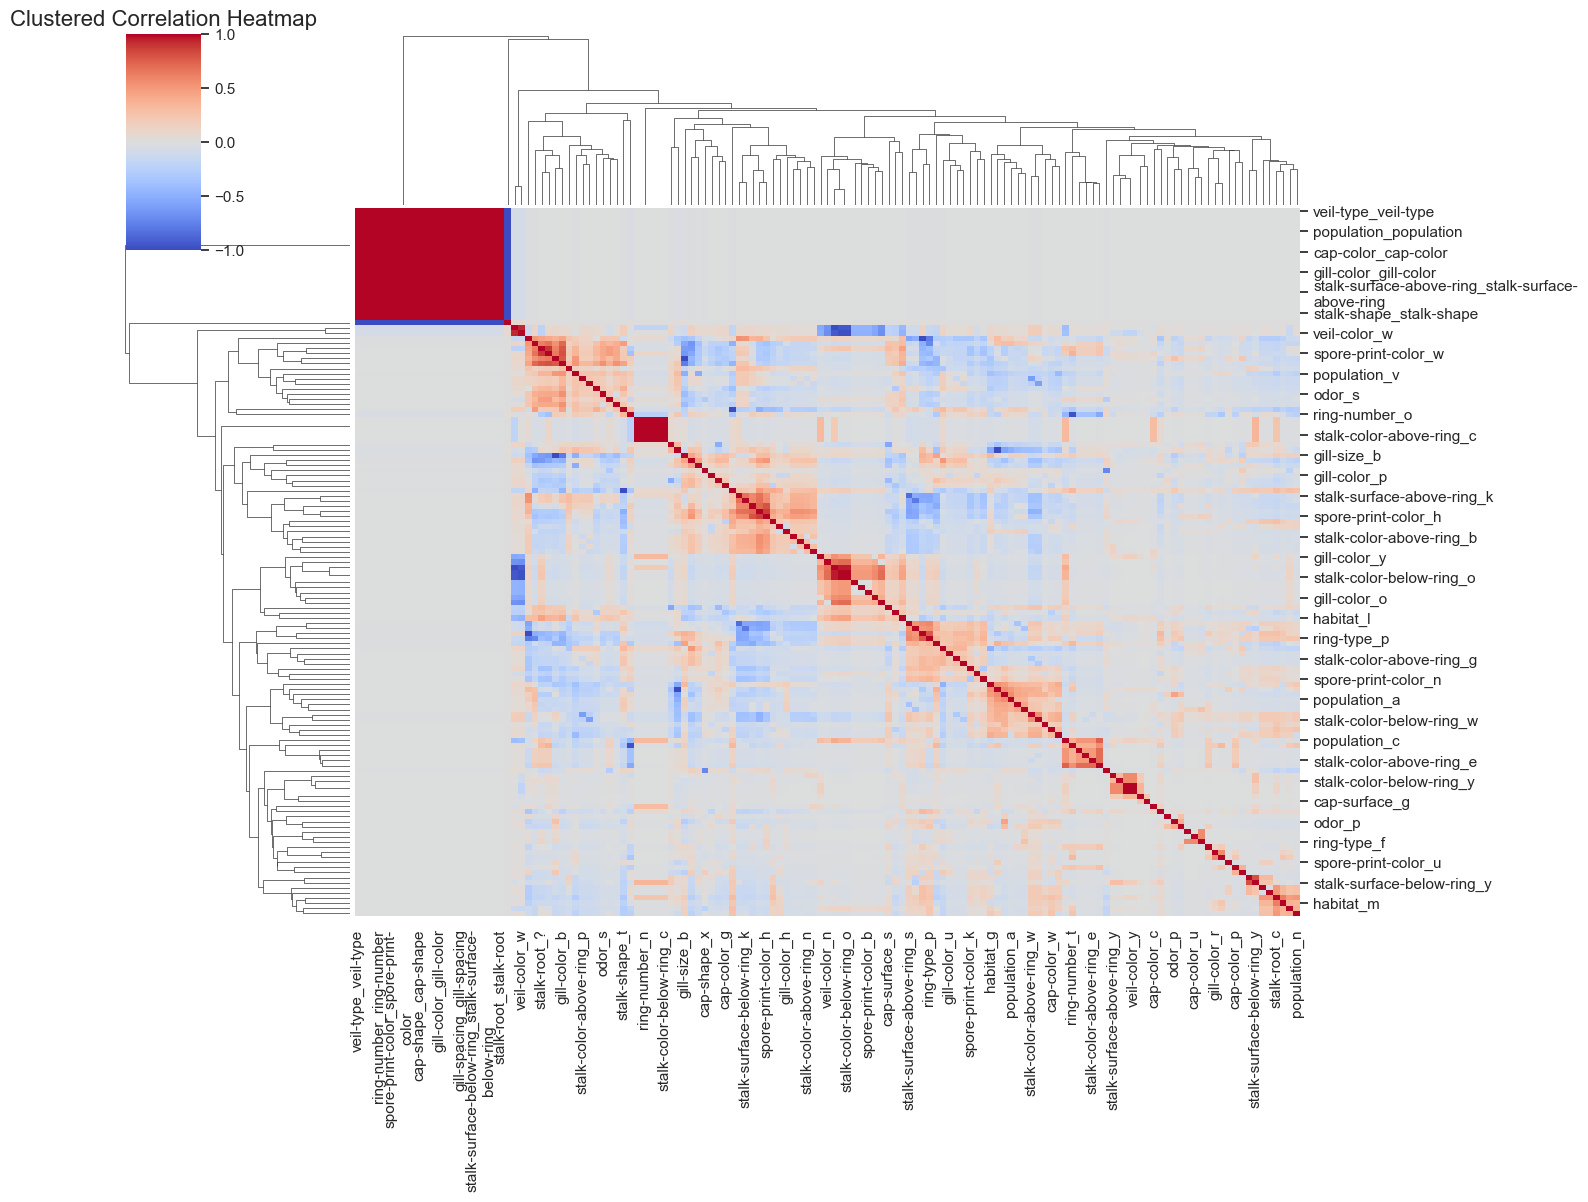

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Set the style for better visuals
sns.set(style="whitegrid")

# File path to your local CSV file
file_path = 'Mushrooms.data.csv'  # Update with your actual file path

# Column names as per the dataset provided
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Load the dataset (with proper column names if the file doesn't include them)
df = pd.read_csv(file_path, sep=',', names=column_names, header=None)

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()

# Clean the 'class' column if necessary (standardizing 'poisonous' -> 'p' and 'edible' -> 'e')
df['class'] = df['class'].replace({'poisonous': 'p', 'edible': 'e'})

# Check the unique values in the 'class' column
print(df['class'].unique())

# 1. **Class Distribution (Edible vs Poisonous)**
# Class distribution (edible vs poisonous)
class_distribution = df['class'].value_counts()

# Plotting the class distribution (Edible vs Poisonous)
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, hue='class', palette="Set2", legend=False)  # Updated line
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Display the class distribution count
print(class_distribution)


# Display class distribution count
print(class_distribution)

# 2. **Check for Missing Values**
# Check if there are any missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values (if any)
print("Missing values per column:")
print(missing_values[missing_values > 0])

# 3. **Feature Distributions**
# Plot the distribution of the first few categorical features (to understand their distribution)
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[1:5]):  # Plotting the first 4 columns
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=column, data=df, hue='class', palette="Set1", legend=False)  # Updated line
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


# 4. **Calculate Point-Biserial Correlation between Features and Target (Class)**
# Convert target ('class') to binary values (1 for poisonous, 0 for edible)
df['class'] = df['class'].map({'p': 1, 'e': 0})

# Calculate point-biserial correlation for each feature with the target variable
correlations = []
for column in df.columns[1:]:  # Skip the target column ('class')
    # Encode each categorical feature using one-hot encoding
    feature = pd.get_dummies(df[column], drop_first=True)  # One-hot encoding
    for col in feature.columns:
        # Calculate the point-biserial correlation between the target and feature
        corr, _ = pointbiserialr(df['class'], feature[col])  # Point-biserial correlation
        correlations.append((column, col, corr))

# Convert the list of correlations to a DataFrame for easier viewing
corr_df = pd.DataFrame(correlations, columns=['Feature', 'Encoded Feature', 'Correlation'])

# Sort correlations by absolute value of correlation to get the most important ones
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

# Display the top correlated features
print("Top Correlations with Target (Poisonous Mushroom):")
print(corr_df.head())

# 5. # Plotting the correlation with the target variable (Poisonous Mushroom)
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Encoded Feature', data=corr_df, hue='Encoded Feature', palette='Blues_d', legend=False)
plt.title('Point-Biserial Correlation with Target (Poisonous Mushroom)')
plt.xlabel('Correlation with Target')
plt.ylabel('Encoded Features')
plt.show()


# 6. **Correlation Heatmap of Features**
# Generate a heatmap for feature correlations (using one-hot encoded variables)
df_dummies = pd.get_dummies(df.drop('class', axis=1))

# Clean up the heatmap with annotations disabled and a clearer color scheme
plt.figure(figsize=(12, 8))
sns.heatmap(df_dummies.corr(), cmap="coolwarm", annot=False, fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap of Categorical Features', fontsize=16)
plt.show()

# 7. **Clustered Heatmap for Better Visual Organization**
# Clustered heatmap with adjusted figure size and font size
sns.clustermap(df_dummies.corr(), cmap="coolwarm", annot=False, figsize=(15, 12))
plt.title('Clustered Correlation Heatmap', fontsize=16)
plt.show()
